In [50]:
import csv
import sys
import mistree
import numpy as np
import math
import networkx
import matplotlib.pyplot as plt

In [8]:
# increase field size to accomodate very high dimensional csv data
csv.field_size_limit(sys.maxsize)

131072

In [37]:
centroidsPath = './centroids.csv'

centroids = []
with open(centroidsPath, newline='') as csvfile:
    csvReader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(csvReader)
    for r in csvReader:
      row = []
      for c in r:
        row.append(float(c))
      centroids.append(row)

centroids = np.array(centroids)
print(centroids)
print(centroids.shape)

[[ 0.00000000e+00  0.00000000e+00  1.73472348e-18 ...  0.00000000e+00
   3.46944695e-18  6.33333333e+00]
 [ 1.00000000e+00  0.00000000e+00 -1.73472348e-18 ...  0.00000000e+00
   3.57142857e-02  4.32142857e+00]
 [ 2.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  4.87500000e+00]
 ...
 [ 7.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  8.75000000e+00]
 [ 8.00000000e+00  0.00000000e+00  1.73472348e-18 ...  0.00000000e+00
   3.46944695e-18  5.44444444e+00]
 [ 9.00000000e+00  0.00000000e+00 -1.73472348e-18 ...  0.00000000e+00
  -3.46944695e-18  8.60000000e+00]]
(10, 23580)


In [40]:
# compute euclidean distances between cluster centroids
def computeDistance(centroids):
  distances = [[0 for _ in range(len(centroids))] for _ in range(len(centroids))]
  for i in range(len(centroids)):
    for j in range(len(centroids)):
      curDistance = 0
      for gene in range(len(centroids[0])):
        curDistance += (centroids[i][gene] - centroids[j][gene])**2
      distance = math.sqrt(curDistance)
      print(i,j,distance)
      distances[i][j] = distance
      distances[j][i] = distance
  return distances

distances = computeDistance(centroids)
print(distances)


0 0 0.0
0 1 223.72412539655753
0 2 234.95539566759916
0 3 167.64727724571333
0 4 243.76332980329275
0 5 227.31036949777737
0 6 211.48144092841233
0 7 261.6286965255873
0 8 219.26608785662341
0 9 224.05105348536253
1 0 223.72412539655753
1 1 0.0
1 2 123.18743593325993
1 3 193.55067759095405
1 4 203.5979901217896
1 5 126.77862918161503
1 6 140.9228427815793
1 7 203.90911528403535
1 8 146.9251635520853
1 9 118.4935703930357
2 0 234.95539566759916
2 1 123.18743593325993
2 2 0.0
2 3 233.34318710592345
2 4 255.2970313551452
2 5 193.7413430317394
2 6 124.4977444439962
2 7 241.6846715634858
2 8 137.1679244449211
2 9 180.3291482782252
3 0 167.64727724571333
3 1 193.55067759095405
3 2 233.34318710592345
3 3 0.0
3 4 168.8240578235223
3 5 176.7925168333336
3 6 182.07751675437063
3 7 260.575444929103
3 8 213.28407634472225
3 9 181.1728870443926
4 0 243.76332980329275
4 1 203.5979901217896
4 2 255.2970313551452
4 3 168.8240578235223
4 4 0.0
4 5 145.0627518104145
4 6 197.44058500581573
4 7 267.639683

In [45]:
# create graph
V = set(range(len(centroids)))
E = set()
for i in range(len(distances)):
  for j in range(i, len(distances)):
    dist = distances[i][j]
    if dist != 0:
      E.add((dist, i, j))

print(V, E)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {(219.26608785662341, 0, 8), (126.77862918161503, 1, 5), (177.60201997725179, 4, 9), (220.10223319074848, 4, 8), (211.48144092841233, 0, 6), (197.44058500581573, 4, 6), (124.4977444439962, 2, 6), (213.28407634472225, 3, 8), (172.90835006054547, 5, 6), (223.72412539655753, 0, 1), (140.9228427815793, 1, 6), (168.8240578235223, 3, 4), (193.7413430317394, 2, 5), (255.2970313551452, 2, 4), (224.05105348536253, 0, 9), (182.07751675437063, 3, 6), (193.55067759095405, 1, 3), (181.1728870443926, 3, 9), (165.94927975953615, 5, 8), (203.90911528403535, 1, 7), (227.31036949777737, 0, 5), (180.3291482782252, 2, 9), (261.6286965255873, 0, 7), (191.09435950738552, 5, 7), (167.64727724571333, 0, 3), (241.6846715634858, 2, 7), (145.0627518104145, 4, 5), (234.95539566759916, 0, 2), (203.5979901217896, 1, 4), (233.34318710592345, 2, 3), (137.1679244449211, 2, 8), (197.13168821881573, 7, 9), (257.9690794864286, 6, 7), (121.23326467108733, 5, 9), (118.4935703930357, 1, 9), (1

In [65]:
def kruskals(V, E):
  MST = set()
  unionFind = {}
  setCounts = [0 for _ in range(len(V))]

  for vertex in V:
    unionFind[vertex] = vertex
    setCounts[vertex] = 1

  sortedEdges = sorted(E)
  for (dist, v1, v2) in sortedEdges:

    # check if added edge creates a cycle
    set1, set2 = unionFind[v1], unionFind[v2]
    if set1 != set2:
      
      # add to current MST
      MST.add((dist,v1,v2))

      # Merge unionFind sets after adding edge
      if setCounts[v1] < setCounts[v2]:
        setCounts[v2] += setCounts[v1]
        setCounts[v1] = 0
        for u in unionFind:
          if unionFind[u] == set1:
            unionFind[u] = set2
      else:
        setCounts[v1] += setCounts[v2]
        setCounts[v2] = 0
        for u in unionFind:
          if unionFind[u] == set2:
            unionFind[u] = set1

  return MST

MST = kruskals(V, E)
print(len(MST), MST)

9 {(123.18743593325993, 1, 2), (137.1679244449211, 2, 8), (124.4977444439962, 2, 6), (121.23326467108733, 5, 9), (118.4935703930357, 1, 9), (191.09435950738552, 5, 7), (167.64727724571333, 0, 3), (168.8240578235223, 3, 4), (145.0627518104145, 4, 5)}


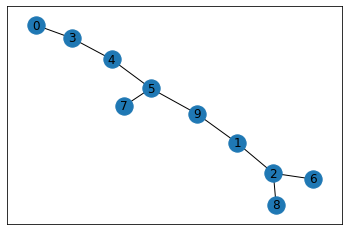

In [66]:
# visualize graph
MSTEdges = [(i,j) for (dist,i,j) in MST]

G = networkx.Graph()
G.add_edges_from(MSTEdges)
networkx.draw_networkx(G)
plt.show()